In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
      #  print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('../input/eda-data-visualization/preprocessed_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817509 entries, 0 to 817508
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Depth                             817509 non-null  int64  
 1   Temperature                       814247 non-null  float64
 2   Salinity                          817509 non-null  float64
 3   O2 Sat                            661274 non-null  float64
 4   Phosphate Concentration           393930 non-null  float64
 5   Silicate Concentration            348693 non-null  float64
 6   Nitrate Concentration             332233 non-null  float64
 7   Reported Specific Volume Anomaly  812092 non-null  float64
 8   Reported Dynamic Height           811598 non-null  float64
 9   Pressure (decibars)               817509 non-null  int64  
 10  Record Indicator                  817509 non-null  object 
 11  Temperature Precision             814247 non-null  f

In [ ]:
df.isnull().sum()

Depth                                    0
Temperature                           3262
Salinity                                 0
O2 Sat                              156235
Phosphate Concentration             423579
Silicate Concentration              468816
Nitrate Concentration               485276
Reported Specific Volume Anomaly      5417
Reported Dynamic Height               5911
Pressure (decibars)                      0
Record Indicator                         0
Temperature Precision                 3262
Salinity Precision                       0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1.fillna(-999, inplace= True)

In [ ]:
df1['Record Indicator'].value_counts()

Low       431806
High      302040
Medium     83663
Name: Record Indicator, dtype: int64

In [ ]:
df2 = df1.replace({'Low':1, 'Medium':2, 'High':3})

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817509 entries, 0 to 817508
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Depth                             817509 non-null  int64  
 1   Temperature                       817509 non-null  float64
 2   Salinity                          817509 non-null  float64
 3   O2 Sat                            817509 non-null  float64
 4   Phosphate Concentration           817509 non-null  float64
 5   Silicate Concentration            817509 non-null  float64
 6   Nitrate Concentration             817509 non-null  float64
 7   Reported Specific Volume Anomaly  817509 non-null  float64
 8   Reported Dynamic Height           817509 non-null  float64
 9   Pressure (decibars)               817509 non-null  int64  
 10  Record Indicator                  817509 non-null  int64  
 11  Temperature Precision             817509 non-null  f

In [ ]:
X = df2.drop('Salinity', axis=1)
y = df2['Salinity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
def model(algo):
    model = algo.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_train, y_train)
    
    score = r2_score(y_test, y_pred)
    
    MAE = mean_absolute_error(y_test, y_pred)
    
    MSE = mean_squared_error(y_test, y_pred)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'The accuracy on training set is {accuracy}')
    print('')
    print(f'The accuracy on test set is {score}')
    print('')
    print(f'The mean absolute error is {MAE}')
    print('')
    print(f'The mean squared error is {MSE}')
    print('')
    print(f'The root mean squared error is {RMSE}')
    

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
bg = BaggingRegressor()
ada = AdaBoostRegressor()
grbt = GradientBoostingRegressor()
xgb = XGBRegressor(tree_method ='gpu_hist', gpu_id= 0, verbosity =0,)
xgbf = XGBRFRegressor()
lgb = LGBMRegressor()
cat = CatBoostRegressor(task_type='GPU', verbose=0)

In [ ]:
models = [lr, dt]

In [ ]:
for mode in models:
    model(mode)
    

The accuracy on training set is 0.5307229806637037

The accuracy on test set is 0.5279358491433381

The mean absolute error is 0.21966499913335755

The mean squared error is 0.10084019765085239

The root mean squared error is 0.31755345636735305
The accuracy on training set is 0.9986464402333045

The accuracy on test set is 0.9948298076196466

The mean absolute error is 0.007934302569340808

The mean squared error is 0.0011044329898418255

The root mean squared error is 0.03323301054436425


In [ ]:
model(lr)

The accuracy on training set is 0.5307229806637037

The accuracy on test set is 0.5279358491433381

The mean absolute error is 0.21966499913335755

The mean squared error is 0.10084019765085239

The root mean squared error is 0.31755345636735305


In [ ]:
model(cat)

The accuracy on training set is 0.981450043882042

The accuracy on test set is 0.9820411237187294

The mean absolute error is 0.03493564158275544

The mean squared error is 0.00383629350058488

The root mean squared error is 0.06193781963053656


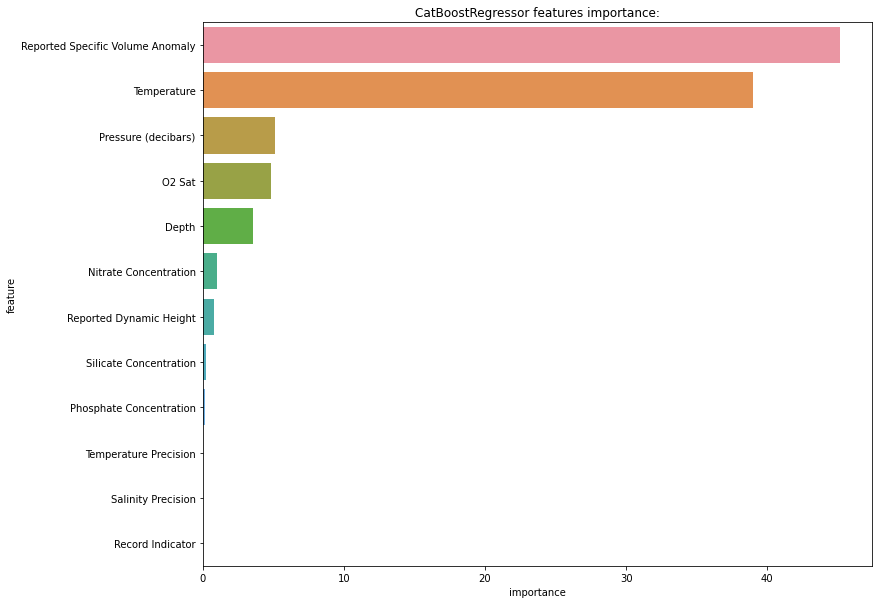

In [ ]:

feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatBoostRegressor features importance:');


In [ ]:
model(lgb)

The accuracy on training set is 0.9910730830376231

The accuracy on test set is 0.9915948801472977

The mean absolute error is 0.02097018351758924

The mean squared error is 0.0017954634887811425

The root mean squared error is 0.04237290984557401


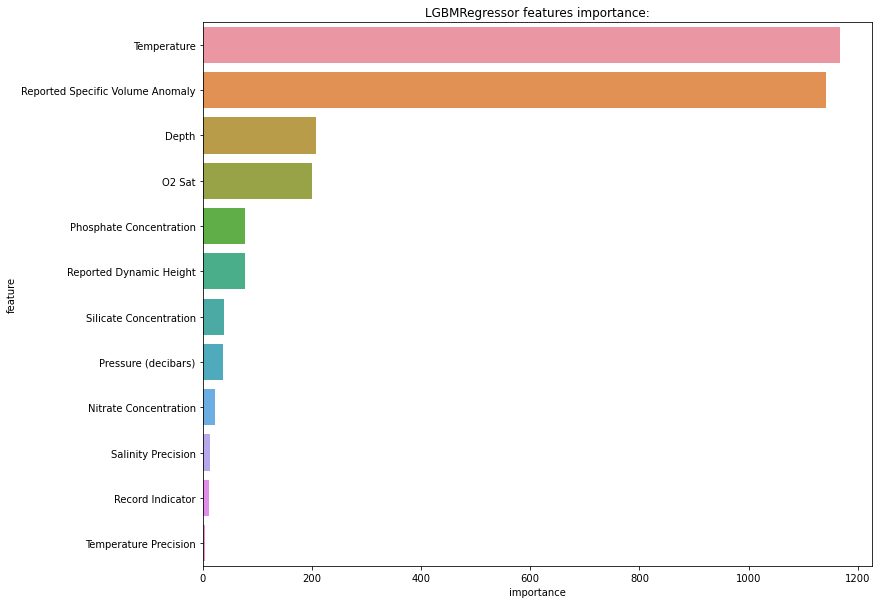

In [ ]:
feature_importance_df = pd.DataFrame(lgb.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMRegressor features importance:');


In [ ]:
model(xgb)

The accuracy on training set is 0.9952254573565898

The accuracy on test set is 0.9950967329738991

The mean absolute error is 0.016593307646471333

The mean squared error is 0.001047413609251287

The root mean squared error is 0.03236377000986268


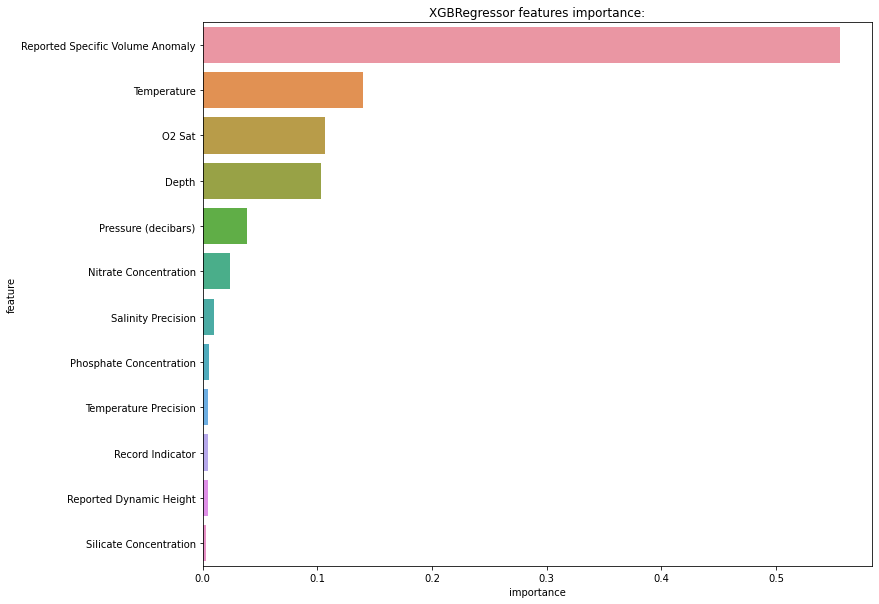

In [ ]:

feature_importance_df = pd.DataFrame(xgb.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('XGBRegressor features importance:');


In [ ]:
model(ada)

The accuracy on training set is 0.6941341200187575

The accuracy on test set is 0.6947236978320159

The mean absolute error is 0.18471995578555064

The mean squared error is 0.06521173572040248

The root mean squared error is 0.2553658859761861


In [ ]:
cross_val_score(CatBoostRegressor(task_type='GPU', verbose=0), X, y, cv=10, scoring='r2').mean()

0.9696239040916733

In [ ]:
cross_val_score(dt, X, y, cv=10, scoring='r2').mean()

0.9888870549838344

In [ ]:
cross_val_score(lgb, X, y, cv=10, scoring='r2').mean()

0.9864851019962279

In [ ]:
cross_val_score(xgb, X, y, cv=10, scoring='r2').mean()

0.9917409138574383

XGBooost has the highest performance based on cross validation score